In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

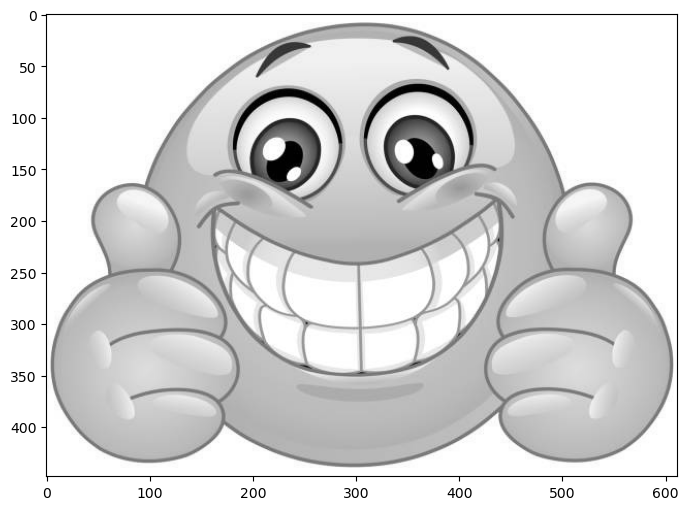

In [63]:
img = Image.open('istockphoto.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

Converting the image data into numpy matrix plotting the result to show the data is unchanged.

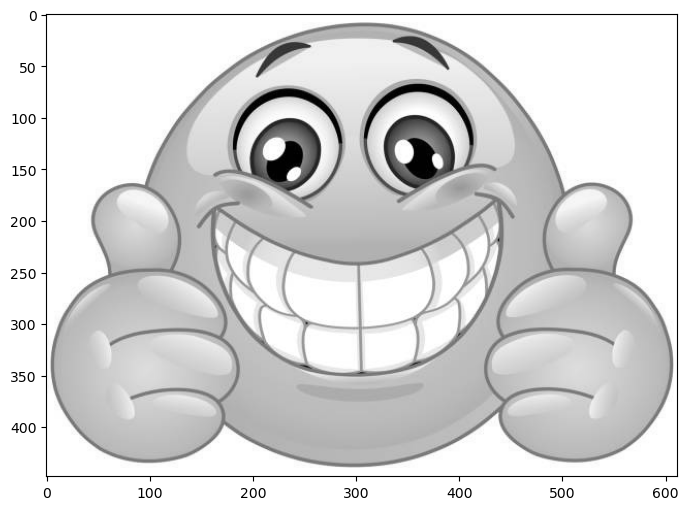

In [64]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9, 6))
plt.imshow(imggray, cmap='gray');

Now to compute the singular value decomposition

In [65]:
U, sigma, V = np.linalg.svd(imgmat)

Computing an approximation of the image

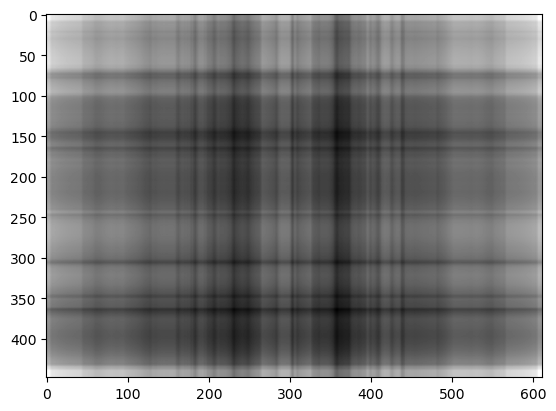

In [66]:
reconstring = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstring, cmap='gray');

The loop below show that reconstructed image using the first n vectors of the singular
value decomposition

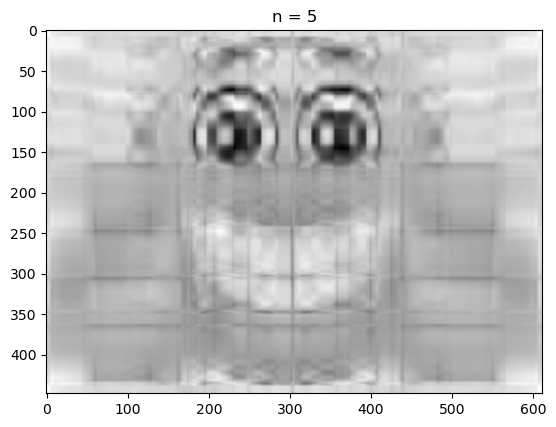

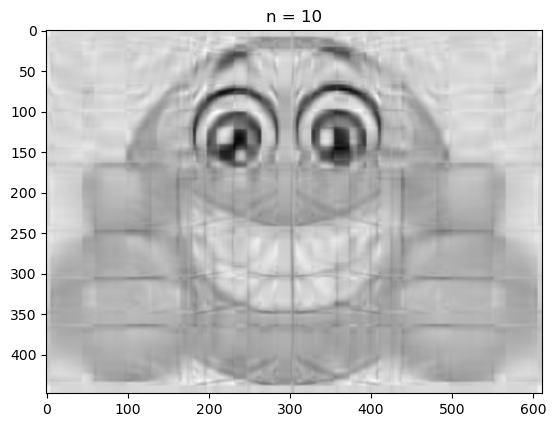

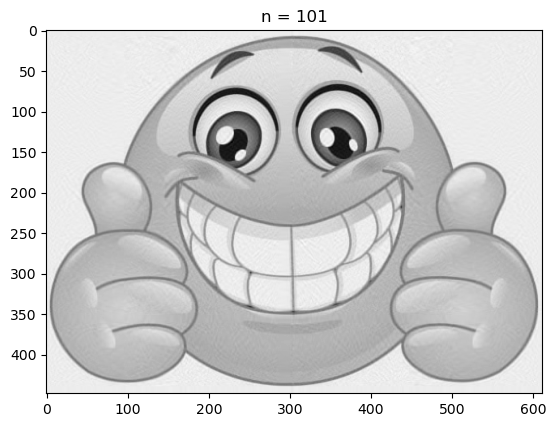

In [69]:
for i in(5, 10, 101):
    reconstring = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstring, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()